In [15]:
pip install PyPDF2 requests


In [20]:
import requests
from PyPDF2 import PdfReader

class PDFSpider:
    def __init__(self, url, save_path):
        self.url = url
        self.save_path = save_path

    def download_pdf(self):
        response = requests.get(self.url)
        with open(self.save_path, 'wb') as f:
            f.write(response.content)

    def extract_text_from_pdf(self):
        text = ""
        with open(self.save_path, 'rb') as f:
            reader = PdfReader(f)
            num_pages = len(reader.pages)
            for page_num in range(num_pages):
                page = reader.pages[page_num]
                text += f"\n--- Page {page_num + 1} ---\n"
                text += page.extract_text()
        return text

    def run_spider(self):
        self.download_pdf()
        extracted_text = self.extract_text_from_pdf()
        return extracted_text

if __name__ == "__main__":
    pdf_url = "https://www.uhbooks.hawaii.edu/computers/pdf/AppleComputers.pdf"
    save_path = "AppleComputers.pdf"

    spider = PDFSpider(pdf_url, save_path)
    extracted_text = spider.run_spider()

    print(extracted_text)





--- Page 1 ---
Last Updated: 5/23/19  Page   of  130
APPLE PRICE LIST 
Apple Computers 
  
Apple iPads/iPods 
Apple Accessories 
Apple Clearance 
All sales are final on Apple hardware, software. clearance, and demonstration merchandise. Exchanges/refunds on defective, or 
unopened merchandise in original purchase condition only. All returns must be accompanied by original sales receipt within 14 consecutive days from date of purchase.  
Pricing and availability of items are subject to change without notice. Call us at (808) 956-4317 for the most up-to-date information.
NEW MacBook Pro 13-inch…………………………………………………..………………………… 
NEW MacBook Pro 15-inch…………………….…………………………………….………..……..… 
MacBook Air…….…………….…………..…..………………………………………………..…………… 
MacBook.…..………………………………………………………………………………………………….. 
NEW iMac……..………………………………………..……………………………………………………..  iMac Pro……………………………………………………………………………………………………….…Mac Mini………………………………………………………………………………………………………… 
Mac Pro…………………………………………………………………………………………………….……

Total Words: 10852
Unique Words: 1684
Most Common Words:
      Word  Count
119      a    345
52      to    225
23     and    194
6       of    174
63     the    149
163      1    143
62     for    122
8    apple    118
81    ipad    108
176   with    107
Found 282 prices: [779.06, 779.06, 988.48, 988.48, 354.97, 354.97, 721.46, 721.46, 208.38, 271.2, 203.14, 203.14, 203.14, 412.56, 412.56, 412.56, 889.0, 621.99, 621.99, 621.99, 191.62, 98.43, 464.92, 779.06, 988.48, 815.7, 124.61, 815.71, 98.43, 82.72, 501.57, 658.64, 1.02, 794.76, 61.78, 61.78, 82.72, 784.29, 941.36, 150.78, 569.63, 941.36, 98.43, 726.7, 103.67, 103.67, 135.08, 1.39, 993.72, 150.78, 360.21, 779.06, 150.78, 936.12, 103.67, 103.67, 135.08, 1.03, 313.09, 1.05, 449.21, 553.93, 61.78, 61.78, 82.72, 0.66, 396.86, 553.93, 0.68, 532.98, 690.05, 61.78, 61.78, 82.72, 3.1, 208.38, 313.09, 61.78, 208.38, 156.02, 314.08, 314.08, 314.08, 314.08, 314.08, 314.08, 314.08, 314.08, 209.37, 209.37, 209.37, 209.37, 209.37, 209.37, 166.49,

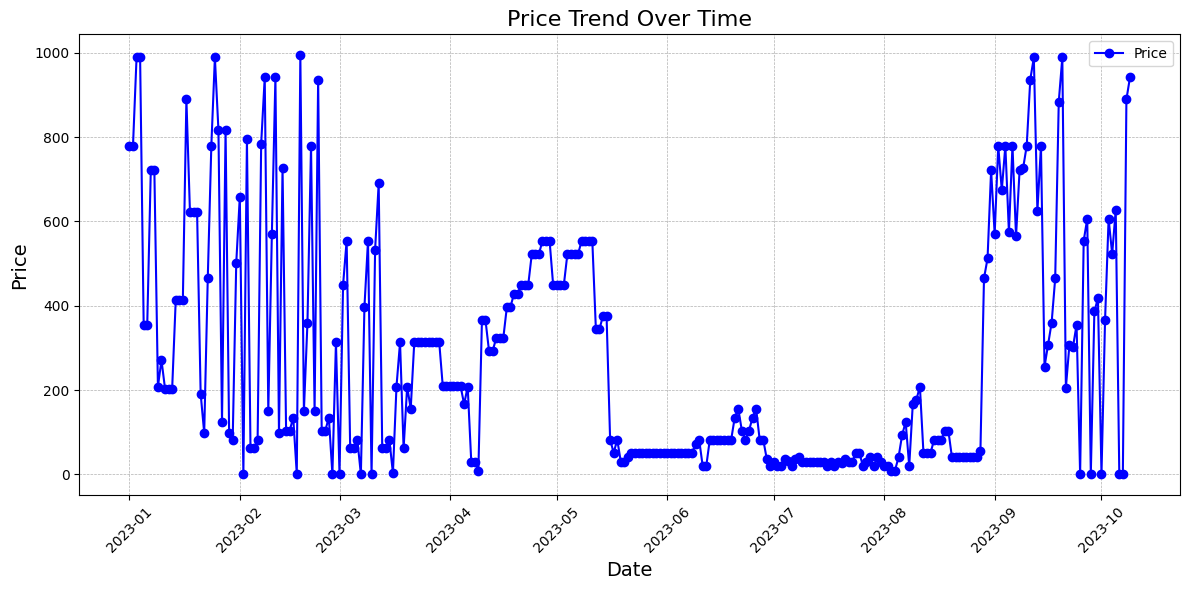

In [14]:
import requests
from PyPDF2 import PdfReader
from collections import Counter
import re
import pandas as pd
import matplotlib.pyplot as plt

class PDFSpider:
    def __init__(self, url, save_path):
        self.url = url
        self.save_path = save_path

    def download_pdf(self):
        response = requests.get(self.url)
        with open(self.save_path, 'wb') as f:
            f.write(response.content)

    def extract_text_from_pdf(self):
        text = ""
        with open(self.save_path, 'rb') as f:
            reader = PdfReader(f)
            num_pages = len(reader.pages)
            for page_num in range(num_pages):
                page = reader.pages[page_num]
                text += page.extract_text()
        return text

    def run_spider(self):
        self.download_pdf()
        extracted_text = self.extract_text_from_pdf()
        return extracted_text

    def prepare_dataset(self, text):
        # Удаление специальных символов и разбиение текста на слова
        words = re.findall(r'\b\w+\b', text.lower())
        word_count = Counter(words)

        # Создание DataFrame для удобства анализа
        df = pd.DataFrame(word_count.items(), columns=['Word', 'Count'])
        return df

    def analyze_dataset(self, df):
        # Базовый анализ датасета
        total_words = df['Count'].sum()
        unique_words = df.shape[0]
        most_common_words = df.nlargest(10, 'Count')

        analysis = {
            "total_words": total_words,
            "unique_words": unique_words,
            "most_common_words": most_common_words
        }
        return analysis

    def extract_prices(self, text):
        # Извлечение цен из текста
        prices = re.findall(r'\b\d+\.\d{2}\b', text)
        prices = [float(price) for price in prices]
        print(f"Found {len(prices)} prices: {prices}")
        return prices

    def generate_price_data(self, prices):
        # Генерация данных для графика на основе извлеченных цен
        num_points = len(prices)
        dates = pd.date_range(start='2023-01-01', periods=num_points, freq='D')
        return pd.DataFrame({'Date': dates, 'Price': prices})

    def plot_prices(self, price_data):
        # Построение графика цен
        plt.figure(figsize=(12, 6))
        plt.plot(price_data['Date'], price_data['Price'], marker='o', linestyle='-', color='b', label='Price')
        plt.title('Price Trend Over Time', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    pdf_url = "https://www.uhbooks.hawaii.edu/computers/pdf/AppleComputers.pdf"
    save_path = "AppleComputers.pdf"

    spider = PDFSpider(pdf_url, save_path)
    extracted_text = spider.run_spider()

    # Подготовка датасета
    dataset = spider.prepare_dataset(extracted_text)

    # Анализ датасета
    analysis = spider.analyze_dataset(dataset)

    # Печать результатов анализа
    print("Total Words:", analysis["total_words"])
    print("Unique Words:", analysis["unique_words"])
    print("Most Common Words:")
    print(analysis["most_common_words"])

    # Извлечение цен и построение графика
    prices = spider.extract_prices(extracted_text)
    if prices:
        price_data = spider.generate_price_data(prices)
        spider.plot_prices(price_data)
    else:
        print("No prices found in the document.")


